# Reconocimiento de las señales de tráfico

In [1]:
import tensorflow as tf
import os
import skimage.io as imd
import numpy as np

C:\Users\mudar\anaconda3\envs\prueba\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mudar\anaconda3\envs\prueba\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mudar\anaconda3\envs\prueba\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mudar\anaconda3\envs\prueba\lib\site-packages\tensorflow\pyth

In [2]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
           if os.path.isdir(os.path.join(data_directory, d))]
    
    labels = []
    images = []
    
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
    
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(d))
        
    return images, labels

In [3]:
main_dir = "../../datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "testing")

In [4]:
images, labels = load_ml_data(train_data_dir)

In [5]:
images = np.array(images, dtype=object)

In [6]:
labels = np.array(labels, dtype=object)

In [7]:
images.ndim

1

In [8]:
images.size

4575

In [9]:
images[0]

array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

In [10]:
labels.ndim

1

In [11]:
labels.size

4575

In [12]:
len(set(labels))

62

In [13]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [14]:
images.itemsize

8

In [15]:
images.nbytes

36600

In [16]:
images.nbytes/images.itemsize

4575.0

In [17]:
import matplotlib.pyplot as plt

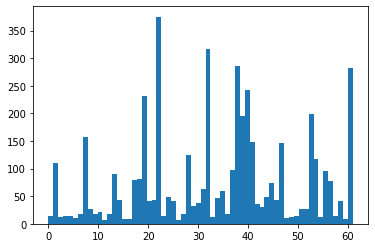

In [18]:
plt.hist(labels, len(set(labels)))
plt.show()

No todas las señales tienen el mismo número de imágenes.

In [19]:
import random

In [20]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

[2854, 476, 645, 3792, 2110, 4166]

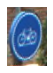

Forma:(67, 45, 3), min:12, max:255


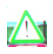

Forma:(74, 73, 3), min:10, max:255


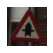

Forma:(139, 140, 3), min:0, max:179


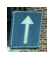

Forma:(200, 176, 3), min:0, max:255


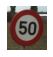

Forma:(230, 208, 3), min:10, max:255


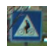

Forma:(57, 57, 3), min:6, max:255


In [21]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1, 6, i + 1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("Forma:{}, min:{}, max:{}".format(temp_im.shape,
                                            temp_im.min(),
                                            temp_im.max()))

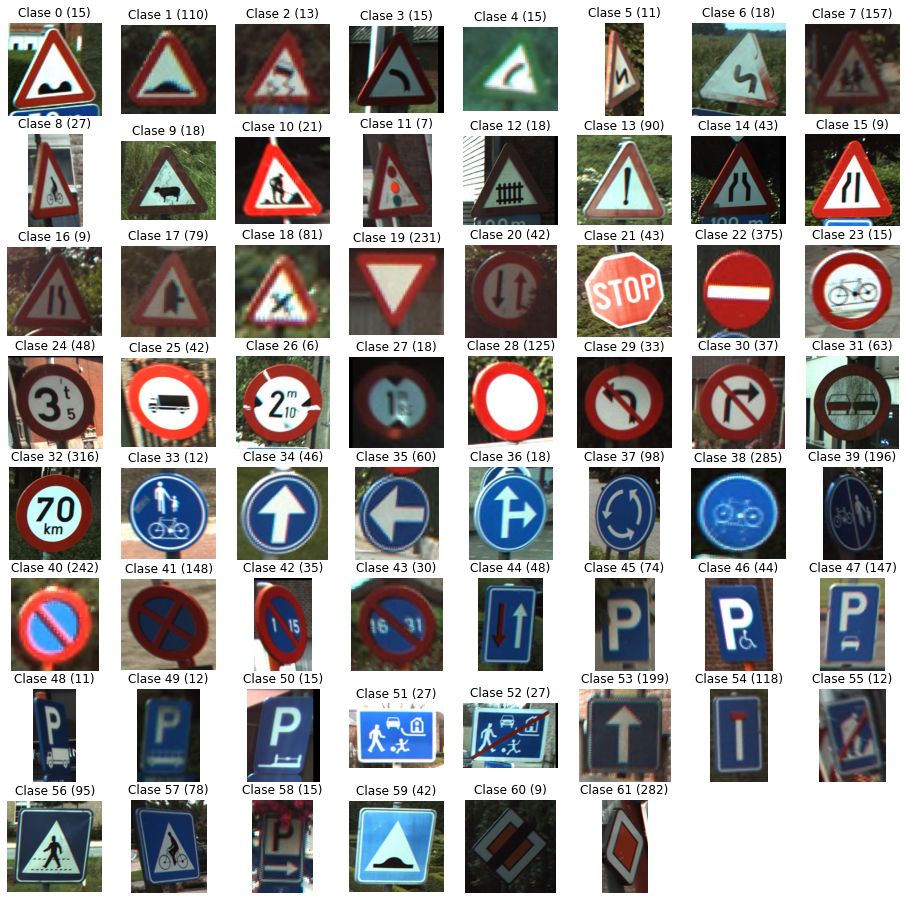

In [22]:
unique_labels = set(labels)
plt.figure(figsize=(16, 16))
i = 1

for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8, 8, i)
    plt.axis("off")
    plt.title("Clase {} ({})".format(label, list(labels).count(label)))
    i += 1
    plt.imshow(temp_im)

plt.show()

## Modelo de Red Neuronal con TensorFlow

* Las imágenes no son todas del mismo tamaño.
* Hay 62 clases de imágenes (desde la 0 hasta la 61).
* La distribución de señales de tráfico no es uniforme (algunas salen más veces que otras).

In [23]:
from skimage import transform

In [24]:
w = 9999
h = 9999
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
        
print("Tamaño mínimo: {}x{}".format(h, w))

Tamaño mínimo: 22x20


In [25]:
images30 = [transform.resize(image, (30, 30)) for image in images]

In [26]:
images[0]

array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

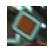

Forma:(30, 30, 3), min:0.010615716206092942, max:0.9999503524930953


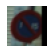

Forma:(30, 30, 3), min:0.0, max:0.6185037054261597


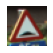

Forma:(30, 30, 3), min:0.055092104661539826, max:0.9175937260915686


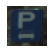

Forma:(30, 30, 3), min:0.06804900868073141, max:0.5645634038466159


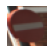

Forma:(30, 30, 3), min:0.08824993254922575, max:0.9899827784790864


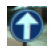

Forma:(30, 30, 3), min:0.0377941586162779, max:0.9996680499225893


In [27]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1, 6, i + 1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("Forma:{}, min:{}, max:{}".format(temp_im.shape,
                                            temp_im.min(),
                                            temp_im.max()))

In [28]:
from skimage.color import rgb2gray

In [29]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

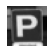

Forma:(30, 30), min:0.06067667328808565, max:0.5476680011635048


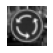

Forma:(30, 30), min:0.09141538960455621, max:0.6559015980304687


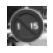

Forma:(30, 30), min:0.07805491686601451, max:0.9954124897878202


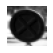

Forma:(30, 30), min:0.11673397949961488, max:0.9976991579726964


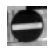

Forma:(30, 30), min:0.11149260204844284, max:0.5493069981667753


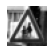

Forma:(30, 30), min:0.060183804426050695, max:0.9792344747944856


In [30]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1, 6, i + 1)
    plt.axis("off")
    plt.imshow(temp_im, cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("Forma:{}, min:{}, max:{}".format(temp_im.shape,
                                            temp_im.min(),
                                            temp_im.max()))

In [31]:
x = tf.placeholder(dtype=tf.float32, shape=[None, 30, 30])
y = tf.placeholder(dtype=tf.int32, shape=[None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits))

train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

final_pred = tf.argmax(logits, 1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Colocations handled automatically by placer.


In [32]:
images_flat

<tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 900) dtype=float32>

In [33]:
logits

<tf.Tensor 'fully_connected/Relu:0' shape=(?, 62) dtype=float32>

In [34]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [35]:
final_pred

<tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>

In [36]:
tf.set_random_seed(2022)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(600):
    _, accuracy_val = sess.run([train_opt, accuracy],
                              feed_dict={
                                  x : images30,
                                  y : list(labels)
                              })
    #_, loss_val = sess.run([train_opt, loss],
                           #feed_dict={
                               #x : images30,
                               #y : list(labels)
                           #})
    
    if i%100 == 0:
        print("EPOCH", i)
        print("Eficacia:", accuracy_val)
        #print("Loss:", loss_val)
    #print("Fin del Epoch ", i)

EPOCH 0
Eficacia: 20.473661
EPOCH 100
Eficacia: 33.76284
EPOCH 200
Eficacia: 33.4741
EPOCH 300
Eficacia: 33.29071
EPOCH 400
Eficacia: 33.32044
EPOCH 500
Eficacia: 33.26295


## Evaluación de la red neuronal

In [37]:
sample_idx = random.sample(range(len(images30)), 40)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [38]:
prediction = sess.run([final_pred], feed_dict={x:sample_images})[0]

In [39]:
prediction

array([22, 22, 13, 32, 32, 47,  7, 57, 53, 53, 37, 47, 40, 54, 40, 40, 19,
       25, 32, 54, 22, 32, 61, 22, 47, 40, 13, 25, 40, 40, 22, 32,  7, 53,
       40, 61, 22, 40, 22, 32], dtype=int64)

In [40]:
sample_labels

[22,
 22,
 17,
 14,
 28,
 47,
 7,
 5,
 53,
 53,
 37,
 47,
 28,
 54,
 41,
 40,
 46,
 25,
 23,
 54,
 39,
 32,
 28,
 58,
 47,
 40,
 3,
 28,
 22,
 40,
 22,
 32,
 18,
 53,
 40,
 61,
 22,
 6,
 22,
 32]

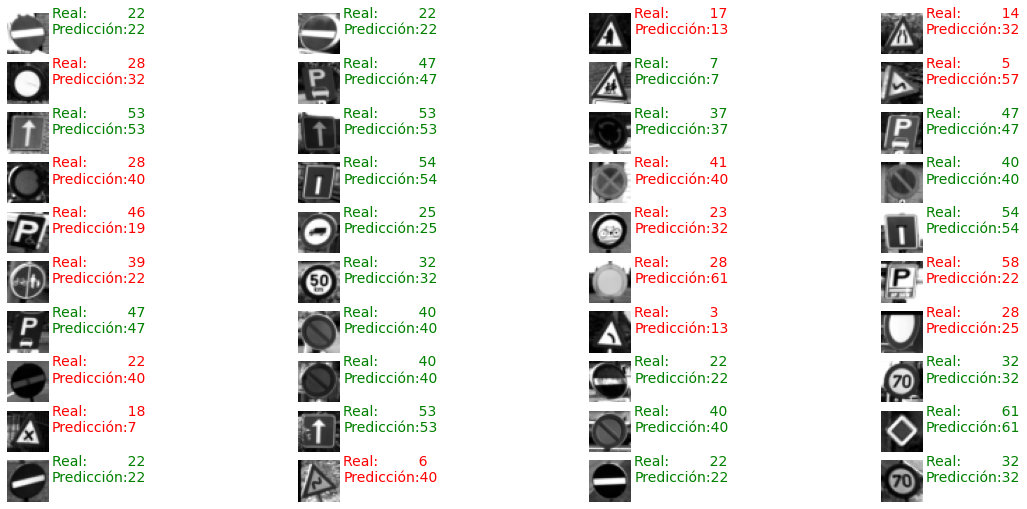

In [41]:
plt.figure(figsize=(20, 9))

for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = prediction[i]
    plt.subplot(10, 4, i + 1)
    plt.axis("off")
    color = "green" if truth==predi else "red"
    plt.text(32, 15, "Real:         {}\nPredicción:{}".format(truth, predi),
            fontsize=14, color=color)
    plt.imshow(sample_images[i], cmap="gray")
plt.show()

In [42]:
test_images, test_labels = load_ml_data(test_data_dir)

In [43]:
test_images30 = [transform.resize(im, (30, 30)) for im in test_images]

In [44]:
len(test_images)

2520

In [45]:
test_images30 = rgb2gray(np.array(test_images30))

In [46]:
prediction = sess.run([final_pred], feed_dict={x:test_images30})[0]

In [47]:
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, prediction)])
match_count

1325

In [48]:
acc = match_count/len(test_labels)*100
print("Eficacia de la red neuronal: {:.2f}%".format(acc))

Eficacia de la red neuronal: 52.58%
